### Jupyter notebook for Logistic Regression, SVM and Random Forest

In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train=pd.read_csv('employee-review-train.csv')
test=pd.read_csv('employee-review-test.csv')

In [3]:
train = train.rename(columns={'Unnamed: 0':"id"})
test = test.rename(columns={'Unnamed: 0':"id"})

In [4]:
train[train['overall-ratings'] == 1].head(10)

,id,overall-ratings,summary,pros,cons
5,59530,1.0,Product Advisor,"Brand recognition, company have a lot of money to burn.","Its a club, clique environment. If you're not in the club you will not go very far regarding advancement or anything else. Like high school. Popular in, unpopular out."
8,8509,1.0,Warehouse Associate - Order Picker,I can't think of any at this time. The co-workers are good.,There is no adherence to safety. Most people complain about political correctness I had to tell people not to tell me about their personal lives.
25,27067,1.0,Data Associate at Amazon Chennai,Good Company Good Salary and hike Good Office space,"office Environment and culture changed from best to worst office management is poor , worst than a startup. too much politics in office if you are not from tamil nadu do not expect any growth peop..."
26,10859,1.0,Bad training,Good pay and have a company vehicle.,The training videos where terrible. A lot of them cut out. They only give you one ride along as a driver and even then you won't get trained properly. The guy I did my ride along with didn't even ...
27,9649,1.0,Poor work life balance,"Competitive salary, some teams are good.","Poor work-life balance, disrespectful teammates, stress ful environment."
61,25651,1.0,Support engineer,"Good Pay, can learn a lot","over load, no job security no worklife balace"
66,62312,1.0,Technology Solution Professional,"Good Company and good vision overall Amazing peer and community on the building, great collaboration","Management is absolute flaming garbage, they don't admit their mistakes and very micromanagement oriented, as a technical resource you have to do activities as forecasting, review of a powerpoint ..."
84,32796,1.0,Horrible Management,10% discount when buy something at Amazon.,Country manager has quite limited communication ability and is isolated in the organization. Nobody make decision. Culture is the worst.
99,28895,1.0,Human Resources,International company Good image for the CV,"Company culture Poor management No team spirit No guidance, no mentorship, no sanity"
121,57237,1.0,Corporate VPs - root of all evil,"Great products. Great people at the Manager, Lead and IC level.",CEO and coterie of disconnected VP running divisions with no apparent connection to reality.


In [5]:
train['combined'] = train[['summary', 'pros','cons']].apply(lambda x: ' '.join(x), axis = 1)
test['combined'] = test[['summary', 'pros','cons']].apply(lambda x: ' '.join(x), axis = 1)

# train2 = train.assign(ColumnA = train.summary.astype(str) + ', ' + train.pros.astype(str) + ', ' train.cons.astype(str))
# test2 = test.assign(ColumnA = test.summary.astype(str) + ', ' + test.pros.astype(str) + ', ' test.cons.astype(str))

In [6]:
train.head()

,id,overall-ratings,summary,pros,cons,combined
0,47567,4.0,Order Support Specialist,"Good Company culture, all managers were friendly.","Hard to get permanent positions, insecure.","Order Support Specialist Good Company culture, all managers were friendly. Hard to get permanent positions, insecure."
1,33778,3.0,Challenging work but work life balance sucks and managers are employee oriented,You get ownership of big P&Ls.,Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P&Ls. Managers are highly political. There is no concept of work-life balance
2,55809,5.0,I love working on products that positively impact the lives of many people.,"Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit of camaraderie towards one mission.","Culture can be somewhat rigid compared to other tech companies and varies greatly between teams, not much company investment into employee groups and activities, almost no company sponsored morale...","I love working on products that positively impact the lives of many people. Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit ..."
3,42100,5.0,Apple Review,Amazing people. Great atmosphere. Management really cares.,Its still retail. People want you to do everything for them.,Apple Review Amazing people. Great atmosphere. Management really cares. Its still retail. People want you to do everything for them.
4,38758,5.0,Operations specialist,Great benefits and people that you work with,Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store


In [7]:
test.head()

,id,overall-ratings,summary,pros,cons,combined
0,34317,5.0,Perfect small big company to work for,"You learn from great peers, work on unique planet scale problem, grow, move around and learn new tech while enjoying first class benefits. Leadership is visionary, genuine, surprisingly transparen...",Commute is not ideal. Company getting bigger is a challenge but Facebook has fully embraced taking it on.,"Perfect small big company to work for You learn from great peers, work on unique planet scale problem, grow, move around and learn new tech while enjoying first class benefits. Leadership is visio..."
1,45892,4.0,Great for retail,"Benefits, third party discounts, professional training, looks good on a resume, good customer service training, management backs you up and doesn't step on your feet during customer interactions","in-store discount could be way better, ""fearless feedback"" from people on the same level as you who don't have the necessary experience to correct you","Great for retail Benefits, third party discounts, professional training, looks good on a resume, good customer service training, management backs you up and doesn't step on your feet during custom..."
2,28135,5.0,Second Home,"I have many reasons to say why I work for Amazon, but one of the best thing is that though I work for 8 hours in office I never felt that I'm working. To be frank it's a place where you play and w...","The way the IJP's conducted at Amazon is what which you would not like as most of the IJP's conducted in Amazon are of interim post 6 months you would be converted as permanent. However, now that ...","Second Home I have many reasons to say why I work for Amazon, but one of the best thing is that though I work for 8 hours in office I never felt that I'm working. To be frank it's a place where yo..."
3,5589,5.0,G Suite Generalist,"Free surfing, free food, accommodation is awesome and never pressures employee. Tools comes in handy.",No increase in salary and office is always have to walk 15 minutes away from all routes of public utility vehicles.,"G Suite Generalist Free surfing, free food, accommodation is awesome and never pressures employee. Tools comes in handy. No increase in salary and office is always have to walk 15 minutes away fro..."
4,65209,3.0,"Changes coming, but still a lot of legacy left","Large company with a lot of red-tape, and legacy left behind. Though media/social report changes - that is in Redmond. In the sites outside Redmond and in EMEA, ASIA, changes are still very slow. ...","Technology is still very cool. Get to use the latest, greatest MS Software","Changes coming, but still a lot of legacy left Large company with a lot of red-tape, and legacy left behind. Though media/social report changes - that is in Redmond. In the sites outside Redmond a..."


In [8]:
train.shape, test.shape

((53927, 6), (13482, 6))

In [9]:
train["overall-ratings"].value_counts()

5.0    18505
4.0    17921
3.0    10130
2.0     4230
1.0     3141
Name: overall-ratings, dtype: int64

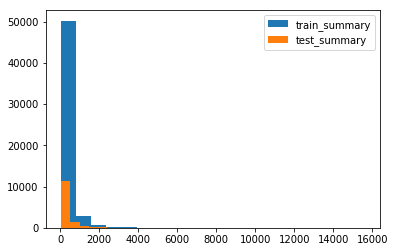

In [10]:
length_train = train['combined'].str.len()
length_test = test['combined'].str.len()

plt.hist(length_train, bins=20, label="train_summary")
plt.hist(length_test, bins=20, label="test_summary")
plt.legend()
plt.show()

In [11]:
combi = train.append(test, ignore_index=True)
combi.shape

(67409, 6)

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [13]:
combi['tidy_combined'] = np.vectorize(remove_pattern)(combi['combined'], "@[\w]*") 
combi.head()

,id,overall-ratings,summary,pros,cons,combined,tidy_combined
0,47567,4.0,Order Support Specialist,"Good Company culture, all managers were friendly.","Hard to get permanent positions, insecure.","Order Support Specialist Good Company culture, all managers were friendly. Hard to get permanent positions, insecure.","Order Support Specialist Good Company culture, all managers were friendly. Hard to get permanent positions, insecure."
1,33778,3.0,Challenging work but work life balance sucks and managers are employee oriented,You get ownership of big P&Ls.,Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P&Ls. Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P&Ls. Managers are highly political. There is no concept of work-life balance
2,55809,5.0,I love working on products that positively impact the lives of many people.,"Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit of camaraderie towards one mission.","Culture can be somewhat rigid compared to other tech companies and varies greatly between teams, not much company investment into employee groups and activities, almost no company sponsored morale...","I love working on products that positively impact the lives of many people. Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit ...","I love working on products that positively impact the lives of many people. Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit ..."
3,42100,5.0,Apple Review,Amazing people. Great atmosphere. Management really cares.,Its still retail. People want you to do everything for them.,Apple Review Amazing people. Great atmosphere. Management really cares. Its still retail. People want you to do everything for them.,Apple Review Amazing people. Great atmosphere. Management really cares. Its still retail. People want you to do everything for them.
4,38758,5.0,Operations specialist,Great benefits and people that you work with,Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store


In [14]:
combi['tidy_combined'] = combi['tidy_combined'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,overall-ratings,summary,pros,cons,combined,tidy_combined
0,47567,4.0,Order Support Specialist,"Good Company culture, all managers were friendly.","Hard to get permanent positions, insecure.","Order Support Specialist Good Company culture, all managers were friendly. Hard to get permanent positions, insecure.",Order Support Specialist Good Company culture all managers were friendly Hard to get permanent positions insecure
1,33778,3.0,Challenging work but work life balance sucks and managers are employee oriented,You get ownership of big P&Ls.,Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P&Ls. Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P Ls Managers are highly political There is no concept of work life balance
2,55809,5.0,I love working on products that positively impact the lives of many people.,"Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit of camaraderie towards one mission.","Culture can be somewhat rigid compared to other tech companies and varies greatly between teams, not much company investment into employee groups and activities, almost no company sponsored morale...","I love working on products that positively impact the lives of many people. Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit ...",I love working on products that positively impact the lives of many people Good exposure to executives good exposure to smart people and access to product groups across the company good spirit ...
3,42100,5.0,Apple Review,Amazing people. Great atmosphere. Management really cares.,Its still retail. People want you to do everything for them.,Apple Review Amazing people. Great atmosphere. Management really cares. Its still retail. People want you to do everything for them.,Apple Review Amazing people Great atmosphere Management really cares Its still retail People want you to do everything for them
4,38758,5.0,Operations specialist,Great benefits and people that you work with,Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store
5,59530,1.0,Product Advisor,"Brand recognition, company have a lot of money to burn.","Its a club, clique environment. If you're not in the club you will not go very far regarding advancement or anything else. Like high school. Popular in, unpopular out.","Product Advisor Brand recognition, company have a lot of money to burn. Its a club, clique environment. If you're not in the club you will not go very far regarding advancement or anything else. L...",Product Advisor Brand recognition company have a lot of money to burn Its a club clique environment If you re not in the club you will not go very far regarding advancement or anything else L...
6,40926,5.0,Great place to work,Working here was very good,Food is not free but is still good,Great place to work Working here was very good Food is not free but is still good,Great place to work Working here was very good Food is not free but is still good
7,26556,5.0,Very satisfied,- Flexible working hours - You own your career path - Talented team to work with,- Intense work environment (not fit for all profiles) - May involve long working hours during peak periods,Very satisfied - Flexible working hours - You own your career path - Talented team to work with - Intense work environment (not fit for all profiles) - May involve long working hours during peak p...,Very satisfied Flexible working hours You own your career path Talented team to work with Intense work enviro

In [15]:
combi['tidy_combined'] = combi['tidy_combined'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
combi.head()

,id,overall-ratings,summary,pros,cons,combined,tidy_combined
0,47567,4.0,Order Support Specialist,"Good Company culture, all managers were friendly.","Hard to get permanent positions, insecure.","Order Support Specialist Good Company culture, all managers were friendly. Hard to get permanent positions, insecure.",Order Support Specialist Good Company culture managers were friendly Hard permanent positions insecure
1,33778,3.0,Challenging work but work life balance sucks and managers are employee oriented,You get ownership of big P&Ls.,Managers are highly political. There is no concept of work-life balance,Challenging work but work life balance sucks and managers are employee oriented You get ownership of big P&Ls. Managers are highly political. There is no concept of work-life balance,Challenging work work life balance sucks managers employee oriented ownership Managers highly political There concept work life balance
2,55809,5.0,I love working on products that positively impact the lives of many people.,"Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit of camaraderie towards one mission.","Culture can be somewhat rigid compared to other tech companies and varies greatly between teams, not much company investment into employee groups and activities, almost no company sponsored morale...","I love working on products that positively impact the lives of many people. Good exposure to executives, good exposure to smart people and access to product groups across the company, good spirit ...",love working products that positively impact lives many people Good exposure executives good exposure smart people access product groups across company good spirit camaraderie towards mission Cult...
3,42100,5.0,Apple Review,Amazing people. Great atmosphere. Management really cares.,Its still retail. People want you to do everything for them.,Apple Review Amazing people. Great atmosphere. Management really cares. Its still retail. People want you to do everything for them.,Apple Review Amazing people Great atmosphere Management really cares still retail People want everything them
4,38758,5.0,Operations specialist,Great benefits and people that you work with,Can sometimes be hectic in the store,Operations specialist Great benefits and people that you work with Can sometimes be hectic in the store,Operations specialist Great benefits people that work with sometimes hectic store


In [17]:
tokenized_combined = combi['tidy_combined'].apply(lambda x: x.split()) # tokenizing

In [18]:
tokenized_combined.head()

0                                                                                       [Order, Support, Specialist, Good, Company, culture, managers, were, friendly, Hard, permanent, positions, insecure]
1                                                 [Challenging, work, work, life, balance, sucks, managers, employee, oriented, ownership, Managers, highly, political, There, concept, work, life, balance]
2    [love, working, products, that, positively, impact, lives, many, people, Good, exposure, executives, good, exposure, smart, people, access, product, groups, across, company, good, spirit, camarade...
3                                                                              [Apple, Review, Amazing, people, Great, atmosphere, Management, really, cares, still, retail, People, want, everything, them]
4                                                                                                              [Operations, specialist, Great, benefits, people, that, work, with, s

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_combined = tokenized_combined.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [20]:
for i in range(len(tokenized_combined)):
    tokenized_combined[i] = ' '.join(tokenized_combined[i])
    
combi['tidy_combined'] = tokenized_combined

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



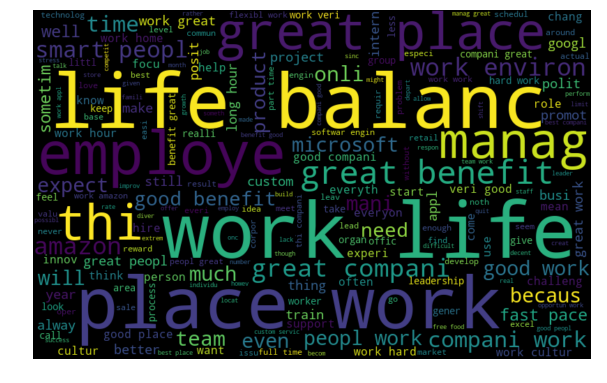

In [78]:
all_words = ' '.join([text for text in combi['tidy_combined']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

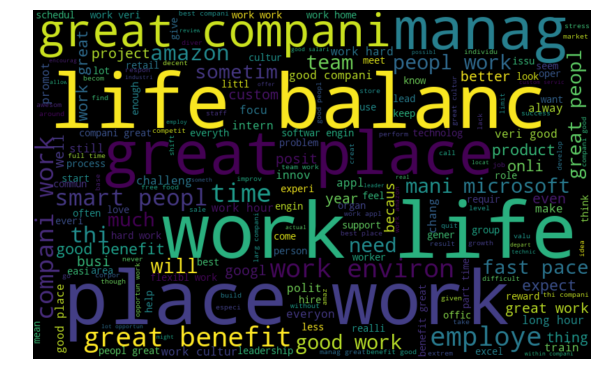

In [22]:
#Words in positive sense
normal_words =' '.join([text for text in combi['tidy_combined'][combi['overall-ratings'] >= 3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

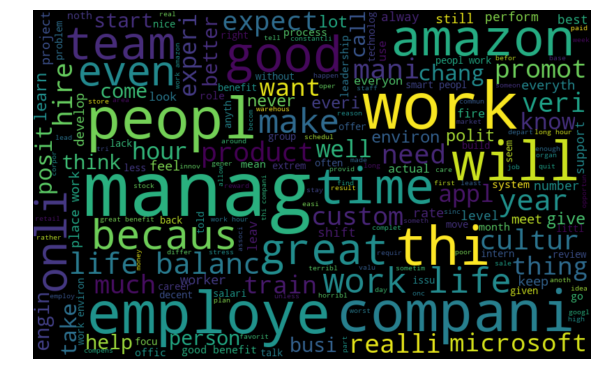

In [23]:
#Considering overall-ratings less than or equal to 2 as negative 
negative_words = ' '.join([text for text in combi['tidy_combined'][combi['overall-ratings'] <= 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
#Extracting Features from Cleaned Words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [25]:
#Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_combined'])
bow.shape

(67409, 1000)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_combined'])
tfidf.shape

(67409, 1000)

In [27]:
#Word Embeddings
# 1 Word2Vec Embeddings
tokenized_tweet = combi['tidy_combined'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_combined, total_examples= len(combi['tidy_combined']), epochs=20)

(0, 291903900)

In [28]:
model_w2v.wv.most_similar(positive="career")

[('carrer', 0.807736873626709),
 ('carreer', 0.7363407611846924),
 ('boundless', 0.6456191539764404),
 ('opp', 0.644375205039978),
 ('unforgett', 0.6394707560539246),
 ('stunt', 0.6364650726318359),
 ('esop', 0.635085940361023),
 ('acceler', 0.6343558430671692),
 ('carrier', 0.6335310339927673),
 ('dearth', 0.6319737434387207)]

In [29]:
model_w2v.wv.most_similar(positive="worst")

[('best', 0.5877430438995361),
 ('horribl', 0.573340117931366),
 ('pathet', 0.5688309669494629),
 ('closest', 0.5680615305900574),
 ('happiest', 0.5567570328712463),
 ('scum', 0.5411139726638794),
 ('mturk', 0.5348507165908813),
 ('rudest', 0.5340501666069031),
 ('hell', 0.5329285860061646),
 ('microsft', 0.5326008796691895)]

In [30]:
model_w2v['work']

array([ 5.92460558e-02,  1.88881680e-01, -2.19237268e-01, -1.23854466e-01,
        8.18278641e-02, -7.47127011e-02, -1.17177539e-01,  2.89547235e-01,
       -5.78073412e-02, -2.65080661e-01, -1.44529089e-01,  3.27626579e-02,
       -1.53277978e-01, -9.19797421e-02, -5.33464290e-02,  7.95058608e-02,
        1.42016947e-01, -1.49860391e-02,  8.02292675e-02, -1.30725224e-02,
        1.08157851e-01,  9.15413424e-02,  2.31721364e-02,  8.38901028e-02,
       -5.39740361e-02,  1.12767378e-02,  3.19297388e-02, -1.08075626e-01,
        4.37569357e-02, -3.52663815e-01, -1.91347674e-01,  1.93590686e-01,
       -1.73422158e-01, -1.78801388e-01, -5.96527308e-02,  2.60081124e-02,
       -4.21205521e-01,  7.80197904e-02,  3.12528074e-01, -3.85589898e-02,
        2.73935884e-01,  1.26740076e-02, -7.40821883e-02, -3.21419567e-01,
       -6.26906008e-02,  8.25422108e-02, -2.42228970e-01,  3.47184949e-02,
        2.35979483e-01,  3.08974180e-02,  3.03566635e-01, -1.75260380e-01,
        3.48068357e-01,  

In [31]:
len(model_w2v['work'])

200

In [32]:
#Preparing Vectors for Comments
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [33]:
#Preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_combined), 200))

for i in range(len(tokenized_combined)):
    wordvec_arrays[i,:] = word_vector(tokenized_combined[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(67409, 200)

In [34]:
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features
#Doc2Vec Embedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [35]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
#We can do so by using Gensim’s LabeledSentence() function.

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["review_" + str(i)]))
    return output

In [36]:
labeled_reviews = add_label(tokenized_combined) # label all the reviews

In [37]:
labeled_reviews[:6]

[LabeledSentence(words='order support specialist good compani cultur manag were friendli hard perman posit insecur', tags=['review_0']),
 LabeledSentence(words='challeng work work life balanc suck manag employe orient ownership manag highli polit there concept work life balanc', tags=['review_1']),
 LabeledSentence(words='love work product that posit impact live mani peopl good exposur execut good exposur smart peopl access product group across compani good spirit camaraderi toward mission cultur somewhat rigid compar other tech compani vari greatli between team much compani invest into employe group activ almost compani sponsor moral type event', tags=['review_2']),
 LabeledSentence(words='appl review amaz peopl great atmospher manag realli care still retail peopl want everyth them', tags=['review_3']),
 LabeledSentence(words='oper specialist great benefit peopl that work with sometim hectic store', tags=['review_4']),
 LabeledSentence(words='product advisor brand recognit compani hav

In [38]:
#Training a doc2vec model

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_reviews)])

/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:575: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 67409/67409 [00:00<00:00, 3250935.25it/s]


In [39]:
model_d2v.train(labeled_reviews, total_examples= len(combi['tidy_combined']), epochs=15)

In [40]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_combined), 200))
for i in range(len(combi)): docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(67409, 200)

# Model Building

1) Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [42]:
#Bag-of-Words Features
train_bow = bow[:53927,:]
test_bow = bow[53927:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['overall-ratings'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [43]:
from collections import Counter
Counter(ytrain)

Counter({1.0: 2220, 4.0: 12557, 5.0: 12951, 3.0: 7080, 2.0: 2940})

In [44]:
Counter(yvalid)

Counter({4.0: 5364, 5.0: 5554, 3.0: 3050, 2.0: 1290, 1.0: 921})

In [45]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.2 # if prediction is greater than or equal to 0.2 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int)) # calculating f1 score

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.27458087902129585

In [46]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.2
test_pred_int = test_pred_int.astype(np.int)
test['overall-ratings'] = test_pred_int
submission = test[['id','overall-ratings']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [47]:
#TF-IDF Features
train_tfidf = tfidf[:53927,:]
test_tfidf = tfidf[53927:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [48]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.3340640070144673

In [49]:
#Word2Vec Features
train_w2v = wordvec_df.iloc[:53927,:]
test_w2v = wordvec_df.iloc[53927:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [50]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.02

prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

0.10771929824561403

In [51]:
#Doc2Vec Features
train_d2v = docvec_df.iloc[:53927,:]
test_d2v = docvec_df.iloc[53927:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [52]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
display(prediction)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

array([[0.01336529, 0.0626421 , 0.1289694 , 0.36814746, 0.42687574],
       [0.02484838, 0.05617202, 0.18510297, 0.33517606, 0.39870057],
       [0.05322471, 0.05357474, 0.16322557, 0.33800122, 0.39197375],
       ...,
       [0.07432037, 0.09487709, 0.18771831, 0.31850612, 0.3245781 ],
       [0.04087207, 0.06004999, 0.20542268, 0.3158378 , 0.37781745],
       [0.03831162, 0.06815103, 0.20263173, 0.37613339, 0.31477224]])

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.07434944237918216

2) Support Vector Machine

In [53]:
from sklearn import svm

In [54]:
#Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)



In [55]:
prediction = svc.predict_proba(xvalid_bow)


In [56]:
display(prediction)

array([[0.01988076, 0.09796146, 0.38267684, 0.47397602, 0.02550492],
       [0.0245017 , 0.04414797, 0.13106761, 0.30592541, 0.49435731],
       [0.02255676, 0.04404521, 0.13219006, 0.30779335, 0.49341462],
       ...,
       [0.02934495, 0.05215789, 0.14372536, 0.27685501, 0.49791679],
       [0.03478847, 0.07791378, 0.18209957, 0.42235134, 0.28284685],
       [0.03746381, 0.06409477, 0.1733221 , 0.41258826, 0.31253106]])

In [57]:
prediction_int = prediction[:,1] >= 0.2


In [58]:
prediction_int = prediction_int.astype(np.int)


In [59]:
f1_score(yvalid, prediction_int, average='weighted',labels=np.unique(prediction_int))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.3631889763779527

In [60]:
#Again let's make predictions for the test dataset and create another submission file.
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.2
test_pred_int = test_pred_int.astype(np.int)
test['overall-ratings'] = test_pred_int
submission = test[['id','overall-ratings']]
submission.to_csv('sub_svc_bow.csv', index=False)

In [61]:
#TF-IDF Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)


In [62]:
display(prediction)

array([[0.04058537, 0.1301015 , 0.28738041, 0.47702284, 0.06490987],
       [0.00617465, 0.01779389, 0.08830493, 0.30266915, 0.58505738],
       [0.00642836, 0.02696725, 0.10209742, 0.3285853 , 0.53592166],
       ...,
       [0.00999512, 0.04689171, 0.12558592, 0.26571129, 0.55181597],
       [0.03264489, 0.0770289 , 0.22399372, 0.44438625, 0.22194624],
       [0.01031295, 0.03756597, 0.15740869, 0.49239107, 0.30232132]])

In [63]:
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.35630383711824587

In [64]:
#Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)


In [65]:
display(prediction)

array([[0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037],
       [0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037],
       [0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037],
       ...,
       [0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037],
       [0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037],
       [0.05882786, 0.07794876, 0.18749925, 0.33264377, 0.34308037]])

In [66]:
prediction_int = prediction[:,1] >= 0.02
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

0.10771929824561403

In [67]:
#Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)


In [68]:
display(prediction)

array([[0.04674773, 0.0948954 , 0.19434911, 0.32032717, 0.34368058],
       [0.03337203, 0.06914791, 0.17644546, 0.3302832 , 0.39075141],
       [0.05241668, 0.0689208 , 0.18059674, 0.32385723, 0.37420855],
       ...,
       [0.05602404, 0.07497688, 0.18817958, 0.33066149, 0.35015802],
       [0.05019947, 0.07154269, 0.17894481, 0.31732105, 0.38199197],
       [0.04782911, 0.07351144, 0.19127709, 0.35430097, 0.33308139]])

In [69]:
prediction_int = prediction[:,1] >= 0.02
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='weighted',labels=np.unique(prediction_int))

0.10771929824561403

3. RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#Bag-of-Words Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction,average='weighted',labels=np.unique(prediction_int))

0.3375594294770206

In [72]:
#Let's make predictions for the test dataset and create another submission file.
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','overall-ratings']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [74]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction,average='weighted',labels=np.unique(prediction_int))

0.3306836248012719

In [76]:
#Word2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction,average='weighted',labels=np.unique(prediction_int))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [77]:
#Doc2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction,average='weighted',labels=np.unique(prediction_int))

0.033507853403141365